First, let us import the github repo, just to get access to the photograph from which we want to make a painting.

In [1]:
!git clone https://github.com/anthony-frion/CycleGAN

Cloning into 'CycleGAN'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


Then, we import the github code shared by CycleGAN's authors : https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [2]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2433, done.
remote: Total 2433 (delta 0), reused 0 (delta 0), pack-reused 2433
Receiving objects: 100% (2433/2433), 8.13 MiB | 26.51 MiB/s, done.
Resolving deltas: 100% (1563/1563), done.


The generator outputs squared images, which is why it is better to input a square image in order not to get a distorted painting.

(506, 900, 3)


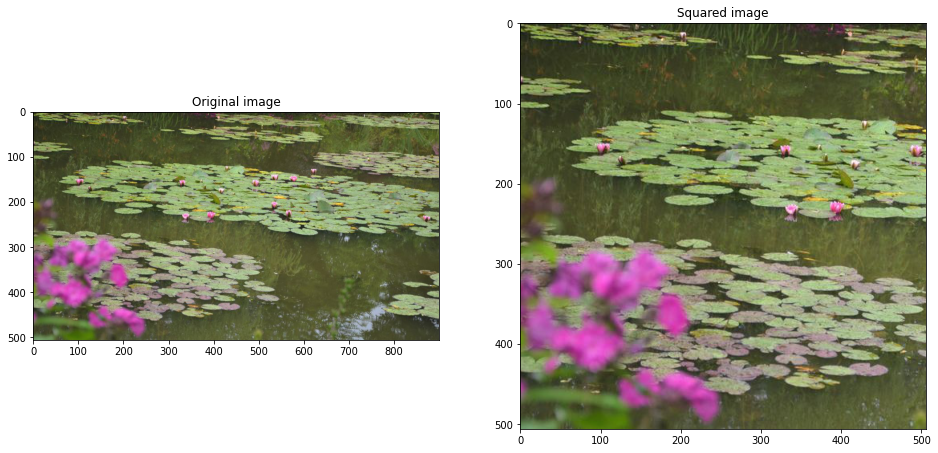

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
# Load the photograph as a numpy array
photograph = plt.imread('CycleGAN/photograph.jpg')
print(photograph.shape)
# Crop the photograph to get a square image
photograph_square = photograph[:,:506,:]

# Visualise the original image and its cropped version
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(photograph)
plt.title('Original image')
plt.subplot(122)
plt.title('Squared image')
plt.imshow(photograph_square)

# Create the directory
os.makedirs('pytorch-CycleGAN-and-pix2pix/datasets/custom_dataset') 
# Save the squared photograph in the directory
plt.imsave('pytorch-CycleGAN-and-pix2pix/datasets/custom_dataset/photograph_square.jpg', photograph_square)

Just move the working directory to have all the necessary code at hand

In [4]:
%cd pytorch-CycleGAN-and-pix2pix

/content/pytorch-CycleGAN-and-pix2pix


Now we import a pretrained model that turns real-life photographs to Monet paintings.

Note that you can generate paintings by other artists by replacing "style_monet" by one of the followings : style_cezanne, style_ukiyoe, style_vangogh

In [5]:
!bash ./scripts/download_cyclegan_model.sh style_monet

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_monet]
for details.

--2021-11-17 09:34:30--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_monet.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_monet_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  1.47MB/s    in 26s     

2021-11-17 09:34:56 (1.67 MB/s) - ‘./checkpoints/style_monet_pretrained/latest_net_G.pth’ saved [45575747/45575747]



Install some packages that are necessary to use the network

In [6]:
!pip install dominate wandb

     |████████████████████████████████| 1.7 MB 7.9 MB/s 
     |████████████████████████████████| 97 kB 4.9 MB/s 
     |████████████████████████████████| 139 kB 62.9 MB/s 
     |████████████████████████████████| 180 kB 74.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=ce04b23e8a2a301a6fa20b5077c09131b4708a5a94b95663a76620fed8a04985
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=d52a97beec3dbd8d0abbf18c9e2ee8bc87712c675ac905a5f7b55defc338e18c
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


Finally, we apply the pretrained model to generated a painting from our photograph.

To perform this task, make sure that you are using a GPU on your Colab session : Runtime -> Change runtime type -> Hardware accelerator -> GPU (en français : Exécution -> Modifier le type d'exécution -> Accélérateur matériel -> GPU)

In [7]:
!python test.py --dataroot datasets/custom_dataset --name style_monet_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/custom_dataset       	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

Let us finally visualise the result...

Text(0.5, 1.0, 'Painting')

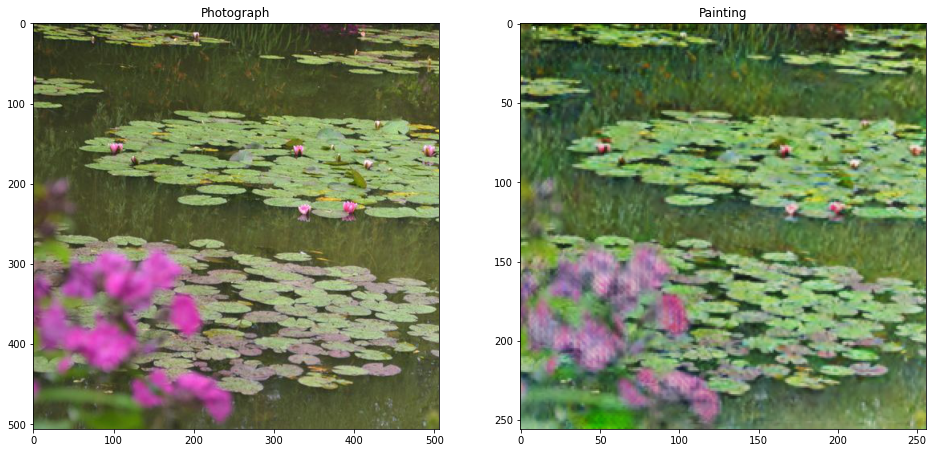

In [8]:
# Retrieve the generated painting
painting = plt.imread('results/style_monet_pretrained/test_latest/images/photograph_square_fake.png')

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(photograph_square)
plt.title('Photograph')
plt.subplot(122)
plt.imshow(painting)
plt.title('Painting')